<a href="https://colab.research.google.com/github/mzignis/advance_house_pricing/blob/master/select_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
HOME = '/content/drive/My Drive/ml_competition/advance_house_pricing'
%cd $HOME

/content/drive/My Drive/ml_competition/advance_house_pricing


In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import power_transform

sns.set()

In [ ]:
data_dir = os.path.join(HOME, 'data')
preprocessed_data_dir = os.path.join(data_dir, 'preprocessed')
os.listdir(preprocessed_data_dir)

['targets.csv', 'train.csv', 'test.csv']

In [ ]:
train_data = pd.read_csv(os.path.join(preprocessed_data_dir, 'train.csv'), index_col=0)
targets_data = pd.read_csv(os.path.join(preprocessed_data_dir, 'targets.csv'),  index_col=0)

## Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74120bda90>]],
      dtype=object)

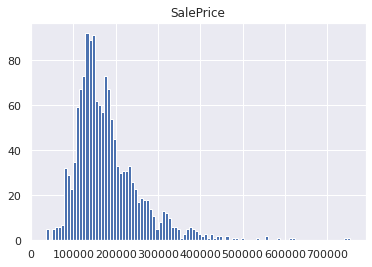

In [ ]:
targets_data.hist(bins=100)

### Standard Deviation Method

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:3128: FutureWarning: The default value of 'method' will change from 'box-cox' to 'yeo-johnson' in version 0.23. Set the 'method' argument explicitly to silence this warning in the meantime.
  FutureWarning)


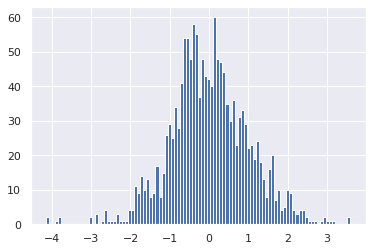

In [ ]:
targets_data['SalePriceProcessed'] = power_transform(targets_data['SalePrice'].values.reshape(-1, 1))
targets_data['SalePriceProcessed'].hist(bins=100)

In [ ]:
targets_data['SalePriceProcessed'].mean(), targets_data['SalePriceProcessed'].std() 

(1.5923335709349847e-15, 1.0003426417780856)

In [ ]:
mean = targets_data['SalePriceProcessed'].mean()
std = targets_data['SalePriceProcessed'].std()
cut_off = 3 * std

In [ ]:
print(targets_data.shape)

(1460, 2)


In [ ]:
query = f'{mean - cut_off} > SalePriceProcessed or SalePriceProcessed > {mean + cut_off}'
std_outliers = targets_data.query(query, engine='python').index
std_outliers

Int64Index([30, 495, 533, 691, 710, 803, 898, 916, 968, 1169, 1182, 1337], dtype='int64')

### Interquartile Range Method

In [ ]:
q25 = targets_data['SalePrice'].quantile(0.25)
q75 = targets_data['SalePrice'].quantile(0.75)
q25, q75

(129975.0, 214000.0)

In [ ]:
iq = q75 - q25
cut_off = 1.5 * iq
cut_off

126037.5

In [ ]:
query = f'{q25 - cut_off} > SalePrice or SalePrice > {q75 + cut_off}'
iq_outliers = targets_data.query(query, engine='python').index
iq_outliers

Int64Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
             309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
             481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
             664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
             877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
            1267, 1268, 1353, 1373, 1388, 1437],
           dtype='int64')

### Sum up outliers

In [ ]:
outliers = std_outliers.tolist() + iq_outliers.tolist()
outliers = set(outliers)
len(outliers)

68

In [ ]:
targets_data = targets_data.drop(outliers)
train_data = train_data.drop(outliers)

In [ ]:
targets_data['SalePrice'].to_csv(os.path.join(preprocessed_data_dir, 'targets.csv'))
train_data.to_csv(os.path.join(preprocessed_data_dir, 'train.csv'))